In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(500)

In [3]:
import ssl
import nltk

# Source: https://github.com/gunthercox/ChatterBot/issues/930#issuecomment-322111087 
# This is to fix the SSL error when downloading nltk data, which is a known issue on Mac OS
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/michaeld./nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
corpus = pd.read_csv(r"data_train_preprocessed.csv", encoding='latin-1', keep_default_na=False)

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
print(corpus.keys())

Index(['Unnamed: 0', 'id', 'image', 'labels', 'text', 'processed_text',
       'processed_text_alt', 'binary_labels'],
      dtype='object')


In [5]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(corpus['processed_text_alt'],corpus['binary_labels'],test_size=0.3)

In [6]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [7]:
Tfidf_vect = TfidfVectorizer(max_features=2000)
Tfidf_vect.fit(corpus['processed_text_alt'])
train_x_Tfidf = Tfidf_vect.transform(train_x)
test_x_Tfidf = Tfidf_vect.transform(test_x)

In [8]:
print(Tfidf_vect.vocabulary_)

{'bernie': 217, 'elizabeth': 577, 'issue': 939, 'matter': 1110, 'make': 1085, 'meme': 1128, 'brexit': 265, 'october': 1239, 'order': 1263, 'ensure': 595, 'deal': 472, 'everyone': 617, 'using': 1858, 'new': 1207, 'prime': 1385, 'minister': 1153, 'take': 1722, 'one': 1256, 'month': 1172, 'applause': 154, 'thai': 1750, 'hong': 860, 'kong': 993, 'get': 739, 'hurt': 881, 'difference': 499, 'stay': 1673, 'wall': 1885, 'mask': 1103, 'protect': 1404, 'virus': 1872, 'say': 1527, 'something': 1629, 'made': 1078, 'china': 343, 'best': 218, 'candidate': 298, 'ja': 944, '2020': 30, 'joe': 956, 'biden': 222, 'harris': 818, 'sander': 1519, 'tiktok': 1771, 'mandatory': 1092, 'event': 612, 'president': 1375, 'trump': 1818, 'people': 1314, 'fed': 667, 'covid': 430, 'vou': 1877, 'breaking': 260, 'news': 1208, 'el': 572, 'ch': 321, 'bought': 252, 'seen': 1546, 'outside': 1278, 'store': 1684, 'wearing': 1907, 'man': 1089, 'donald': 521, 'went': 1924, 'victoria': 1867, 'secret': 1543, 'customer': 449, 'han'

In [9]:
# fit the training dataset on the NB classifier
naive = naive_bayes.MultinomialNB()
naive.fit(train_x_Tfidf,train_y)
# predict the labels on validation dataset
predictions_NB = naive.predict(test_x_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)

Naive Bayes Accuracy Score ->  73.89380530973452


In [10]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_x_Tfidf,train_y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_x_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)

SVM Accuracy Score ->  76.76991150442478


In [11]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions_NB))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       577
           1       0.74      0.43      0.54       327

    accuracy                           0.74       904
   macro avg       0.74      0.67      0.68       904
weighted avg       0.74      0.74      0.72       904


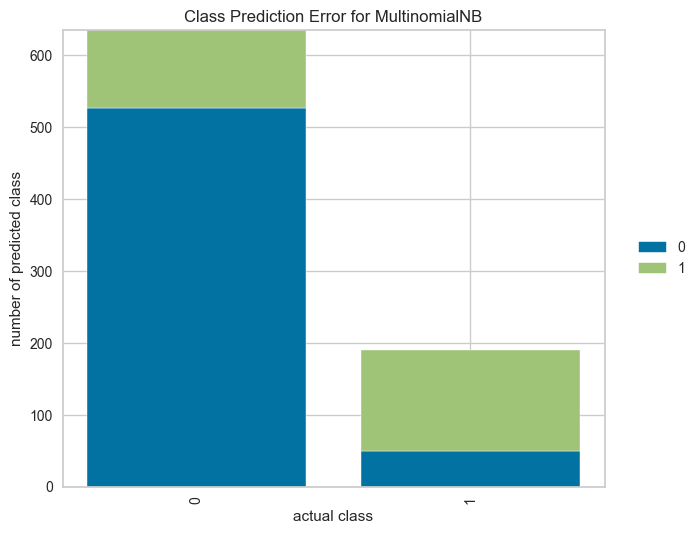

In [12]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    naive, classes=encoder.classes_
)

# Fit the training data to the visualizer
visualizer.fit(train_x_Tfidf,train_y)

# Evaluate the model on the test data
visualizer.score(test_x_Tfidf, test_y)

# Draw visualization
g = visualizer.poof()

In [13]:
# Classifier - Algorithm - SVM
svm_class = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_class.fit(train_x_Tfidf,train_y)

predictions_SVM = SVM.predict(test_x_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)

SVM Accuracy Score ->  76.76991150442478


In [14]:
print(classification_report(test_y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       577
           1       0.75      0.54      0.62       327

    accuracy                           0.77       904
   macro avg       0.76      0.72      0.73       904
weighted avg       0.77      0.77      0.76       904
